<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Clasificación de las flores Iris

Crear un modelo de clasificación para la estimación de la espacie de iris<br>
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [3]:
df_target.value_counts()

species
0          50
1          50
2          50
dtype: int64

In [4]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [5]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda......
df_target_categorical['species'] = df_target.apply(lambda x: 'setosa' if x.species == 0 else 'versicolor' if x.species == 1 else 'virginica', axis=1)

In [6]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [7]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
df_target_categorical['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [31]:
categories = df_target_categorical['species'].unique()
categories

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data" o "df_target"
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [10]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print('Datos disponibles para analizar: ', df.shape[0])

Datos disponibles para analizar:  150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

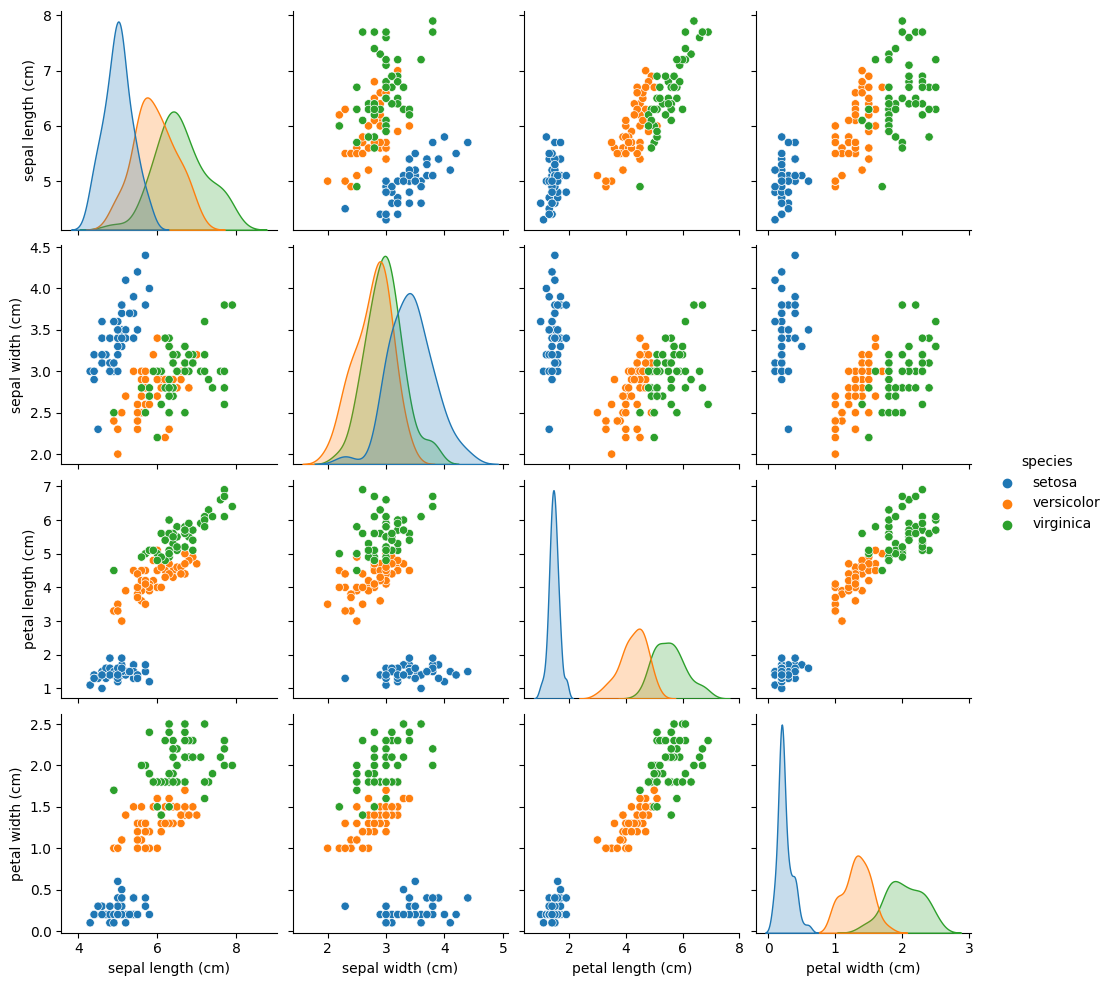

In [11]:
# Observar todas las relaciones entre todos los features
sns.pairplot(df, hue= 'species')

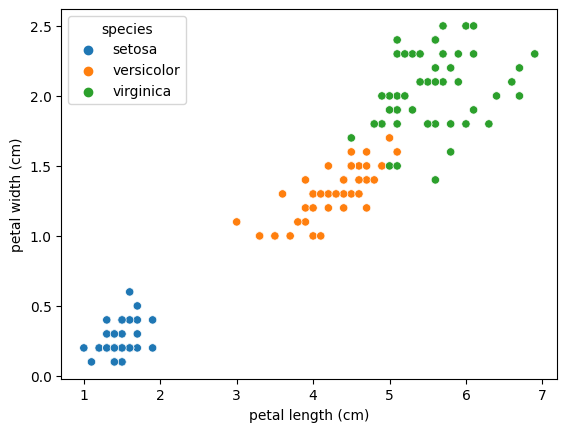

In [12]:
# Para la clasificación utilizaremos todos los features de entrada
# pero utilizaremos este gráfico en particular para ver como
# performa el clasificador
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'])
plt.show()

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [13]:
# Creamos el modelo base
class RandomBaseModel():
    def __init__(self):
        self.classes_ = [0, 1]
    def fit(self,X, y):
        self.classes_ = np.unique(y)
        return None

    def predict(self,X):
        rand = np.random.randint(0, len(self.classes_), size=X.shape[0])
        rand_clases = [self.classes_[x] for x in rand]
        return np.asarray(rand_clases)

In [14]:
# Almuno: Crear un numpy array "X" con los features de entrada (todos excepto species)
# Crear un numpy array "Y" de la columna species
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()

x = df1.drop('species', axis=1).values
# print(x)

le = LabelEncoder()

y = np.array(le.fit_transform(df1['species']))
# print(type(y))

In [15]:
# Alumno: Cree los dataset de entrenamiento (train) y evaluación (test)
# utilizando la herramienta train_test_split de scikit-learn, utilice la proporción
# 70%30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [18]:
# Almuno: Utilizar el modelo base y entrenarlo con el set de datos de train
# Luego obtener y_hay_base con las predicción del set de datos de test


random_base = RandomBaseModel()

random_base.fit(X_train, y_train)

y_hat_base = random_base.predict(X_test)
y_hat_base

array([0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1,
       1])

In [ ]:
# Alumno: Entrenar un clasificador utilizando algunos de los siguientes algoritmos
# - Random forest
# - KNN
# - SVM

In [19]:
# Randomforest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_hat_RF = clf.predict(X_test)

In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train, y_train)
y_hat_KNN = clf_KNN.predict(X_test)



In [21]:
# SVM
from sklearn import svm
clf_SVM = svm.SVC(kernel='poly', degree=3)
clf_SVM.fit(X_train, y_train)
y_hat_SVM = clf_SVM.predict(X_test)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [22]:
# Alumno: Calcular la exactitud (accuracy) del modelo base
from sklearn.metrics import accuracy_score
print('Accuracy Modelo Base: ', accuracy_score(y_test, y_hat_base, normalize=True))

Accuracy Modelo Base:  0.2222222222222222


In [23]:
# Alumno: Calcular la exactitud (accuracy) del clasificador
print('Accuracy Modelo RandomForest: ', accuracy_score(y_test, y_hat_RF, normalize=True))
print('Accuracy KNN: ', accuracy_score(y_test, y_hat_KNN, normalize=True))
print('Accuracy SVM: ', accuracy_score(y_test, y_hat_SVM, normalize=True))


Accuracy Modelo RandomForest:  1.0
Accuracy KNN:  1.0
Accuracy SVM:  0.9777777777777777


In [27]:
print(clf.classes_)

[0 1 2]


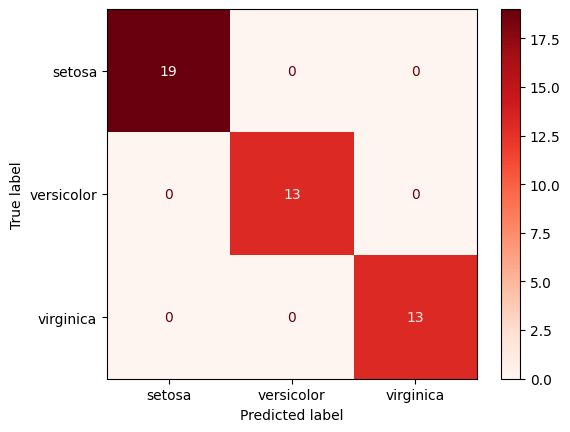

In [32]:
# Dibujar la matriz de confusión con y_test e y_hat_base. Colocar los "labels" (titulos) correspondientes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Confusion Matrix Random Base Model

cm_RF = confusion_matrix(y_test, y_hat_RF)
cmd_RF = ConfusionMatrixDisplay(cm_RF, display_labels=categories)
cmd_RF.plot(cmap=plt.cm.Reds)
plt.show()

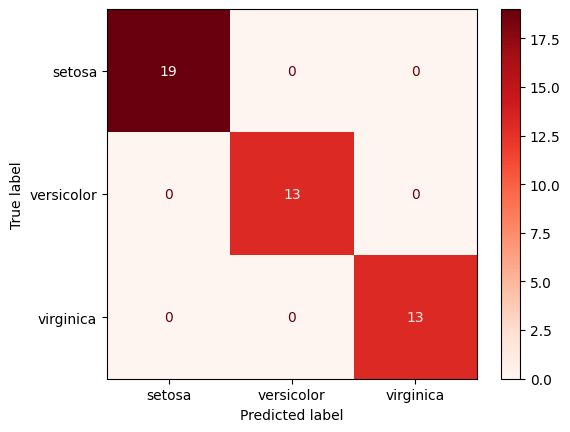

In [33]:
#Confusion Matrix KNN

cm_KNN = confusion_matrix(y_test, y_hat_KNN)
cmd_KNN = ConfusionMatrixDisplay(cm_KNN, display_labels=categories)
cmd_KNN.plot(cmap=plt.cm.Reds)
plt.show()

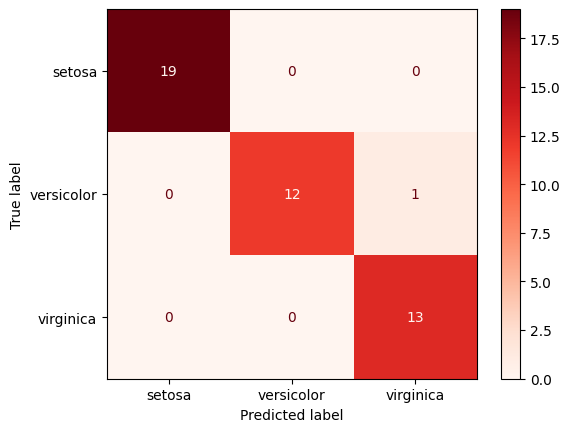

In [34]:
# Confusion Matrix SVM

cm_SVM = confusion_matrix(y_test, y_hat_SVM)
cmd_SVM = ConfusionMatrixDisplay(cm_SVM, display_labels=categories)
cmd_SVM.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [35]:
# Alumno: realice la predicción de todos los "X" con su clasificador para obtener
# "y_graficar"

y_graficar_RF = clf.predict(x)
y_graficar_KNN = clf_KNN.predict(x)
y_graficar_SVM = clf_SVM.predict(x)

In [41]:
# Alumno, volver a realizar el gráfico del scatter con las 3 especies, pero ahora
# utilice en el parámetro "hue" el y_graficar "calculado"

df2 = df1.drop('species', axis=1)

df_RF = pd.DataFrame(data= y_graficar_RF, columns= ['species'])
df_RF = df2.join(df_RF)

df_KNN = pd.DataFrame(data= y_graficar_KNN, columns= ['species'])
df_KNN = df2.join(df_KNN)

df_SVM = pd.DataFrame(data= y_graficar_SVM, columns= ['species'])
df_SVM = df2.join(df_SVM)

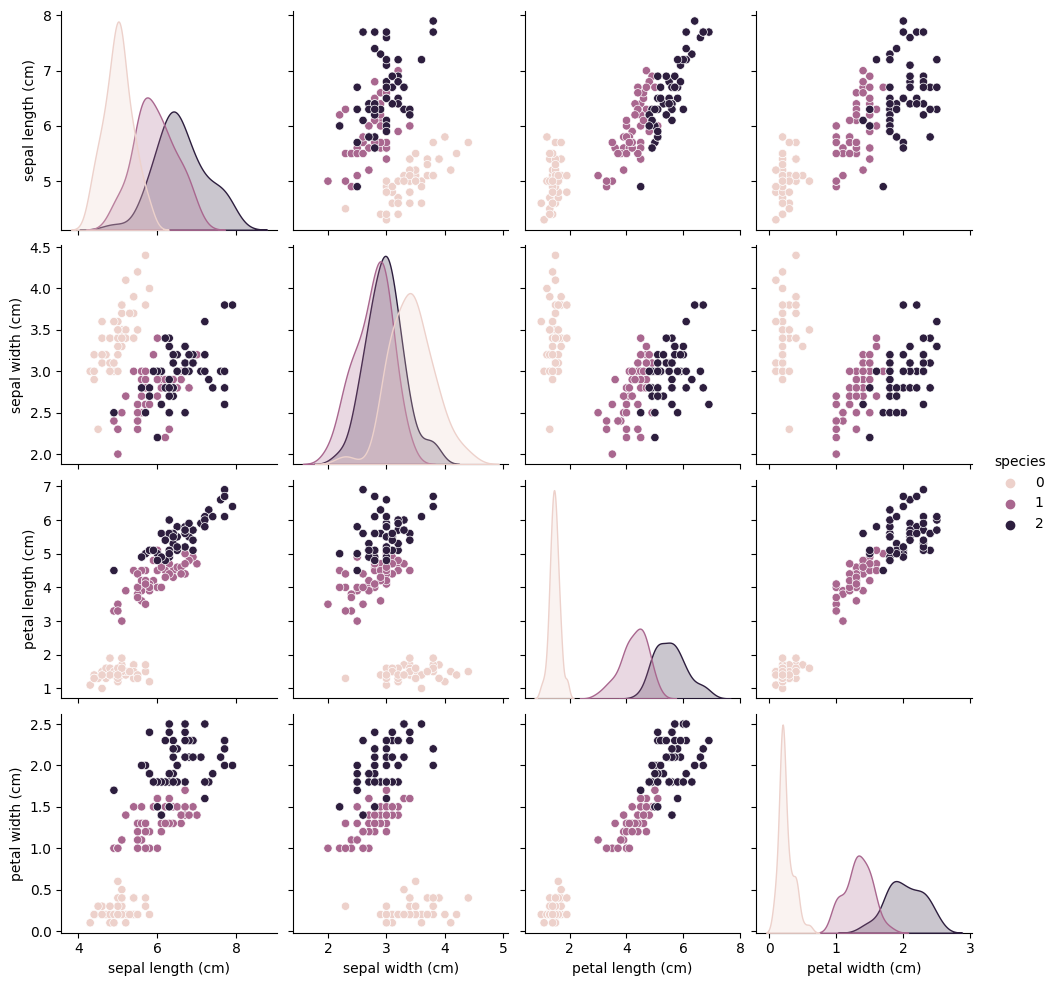

In [74]:
#Scatter Graphs Random Forest

sns.pairplot(df_RF, hue='species')
plt.show()


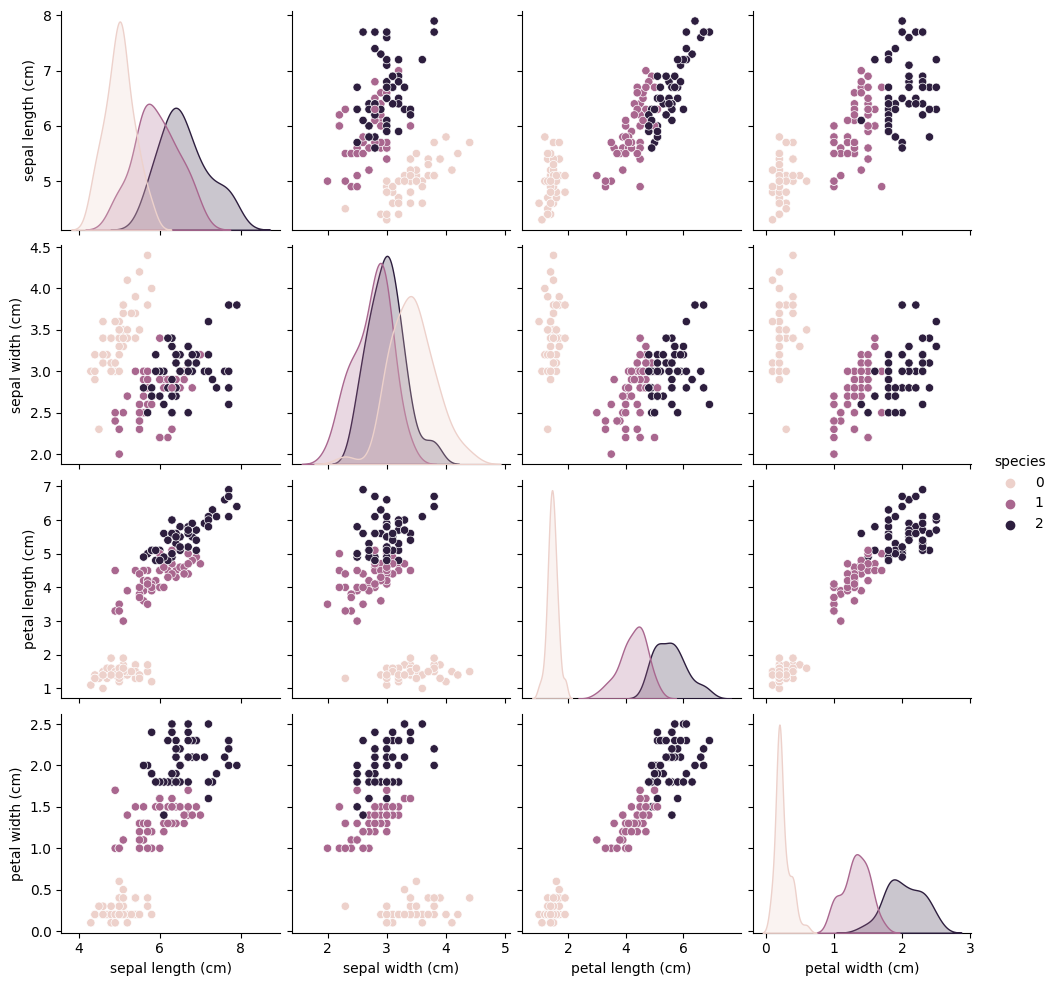

In [68]:
#Scatter Graphs KNN

sns.pairplot(df_KNN, hue='species')
plt.show()


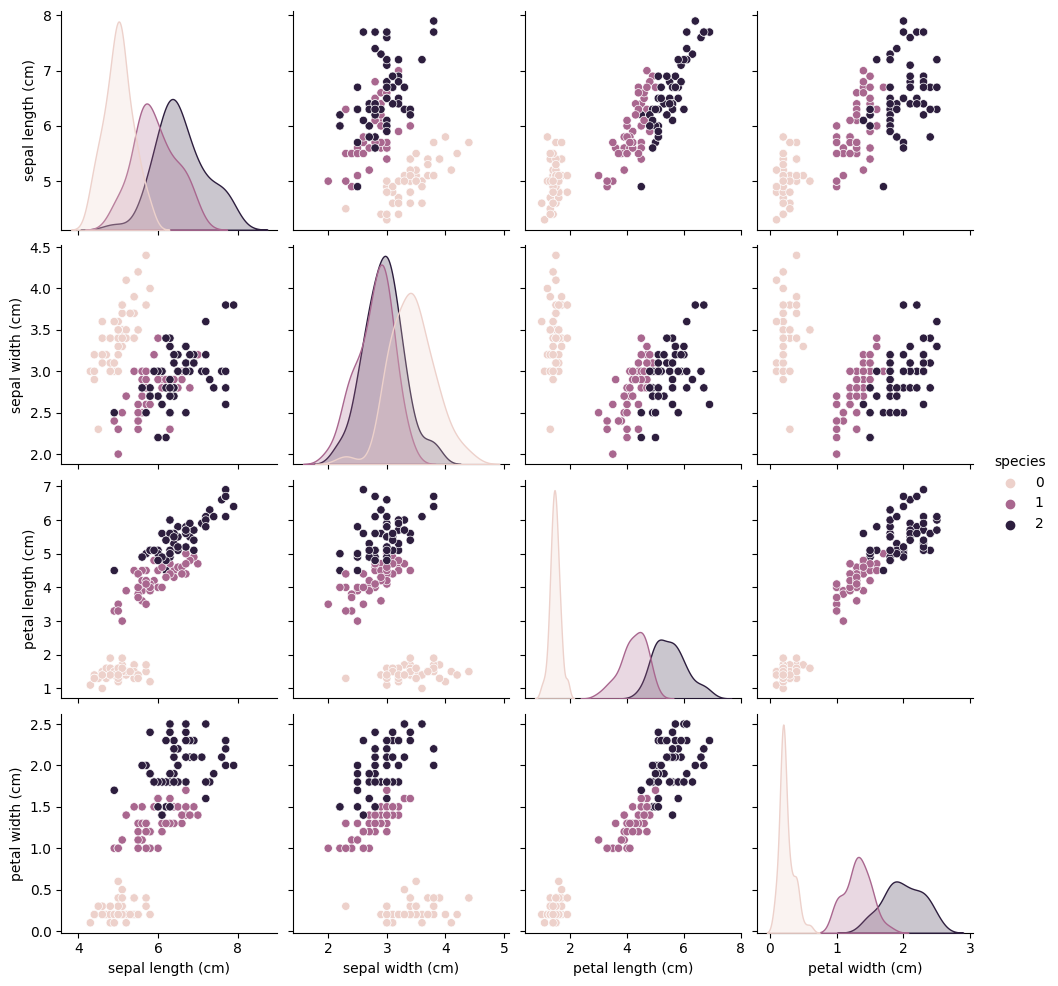

In [69]:
#Scatter Graphs SVM

sns.pairplot(df_SVM, hue='species')
plt.show()
